# mBuild Tutorial 03: Connecting Components with Ports

This tutorial demonstrates how to create ports on `Compounds` which allows them to be connected together.

As in the prior tutorials, we need to first import mbuild (here as `mb`), import the visualization routines (as `visualize`), and apply the matplotlib command to redirect plots to the notebook window.

In [1]:
%matplotlib notebook
from visualize import visualize
import mbuild as mb

We've already shown that `Particles` can be connected (i.e. bonded) by using the `add_bond` routine; however, this does not actually move the atoms in space, and it would become burdensome to need to manually update the position of each atom. Additionally, having to create fixed bonds for all connections would make mBuild less flexible; again, a key function of mBuild is the ability to exchange and swap `Compounds`, allowing arbitrary molecules to be constructed.  

This is where [mBuild's `Port` class](http://mosdef-hub.github.io/mbuild/data_structures.html#mbuild.port.Port) comes into play. `Ports`, in the most general sense, define a location in space; however, in most cases these can be thought of as dangling bonds.

Let's test this functionality by using `Ports` instead of `add_bond` to create a ch2 moiety. First, we'll create an empty `Compound` for CH2 that we will add three `Particles` to at unrealistic locations.

<IPython.core.display.Javascript object>


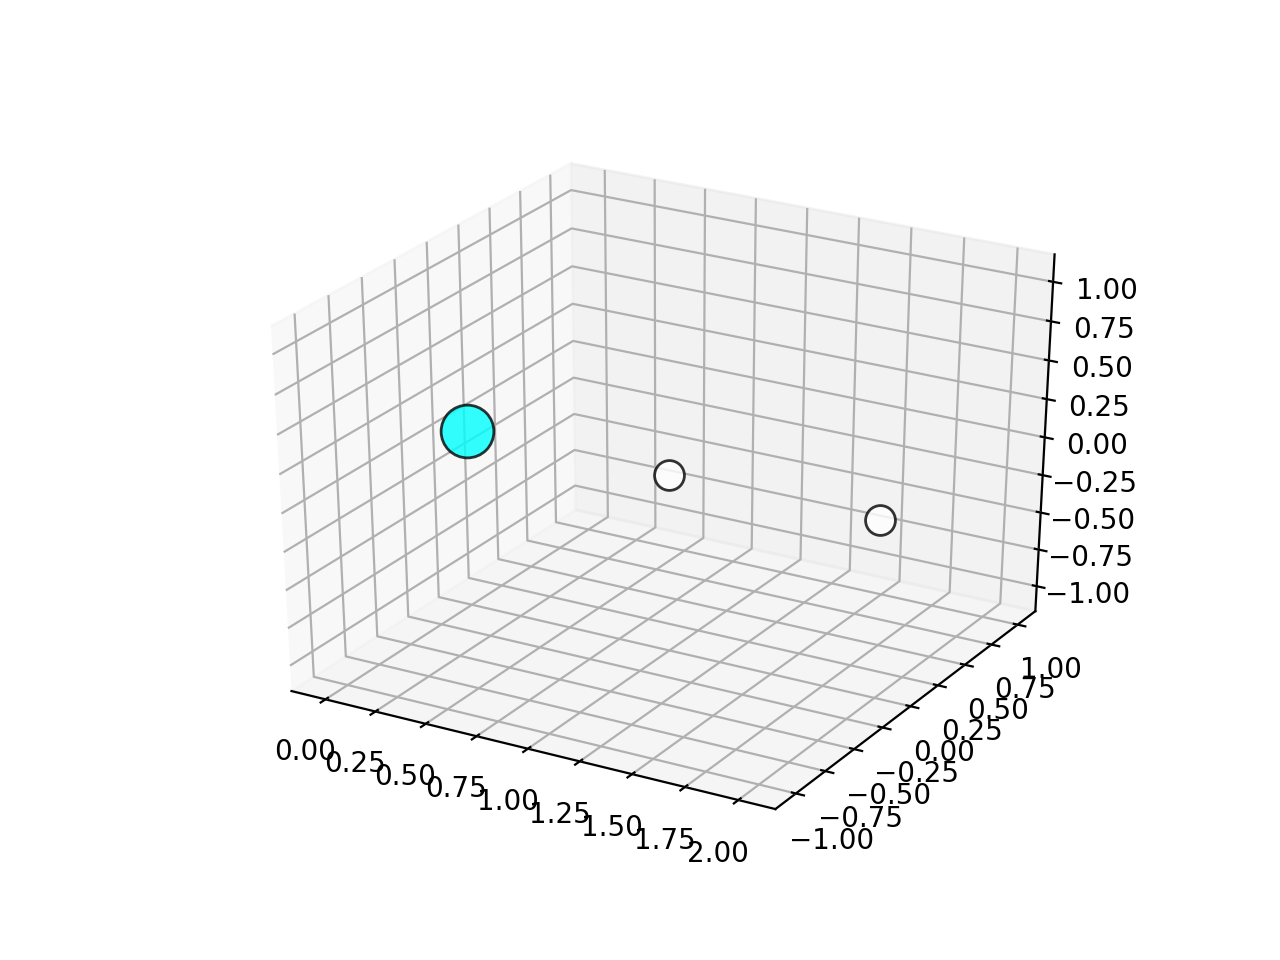

In [2]:
ch2 = mb.Compound()
carbon = mb.Particle(pos=[0.0, 0.0, 0.0], name='C')
hydrogen = mb.Particle(pos=[1.0, 0.0, 0.0], name='H')
hydrogen2 = mb.Particle(pos=[2.0, 0.0, 0.0], name='H')
ch2.add([carbon, hydrogen, hydrogen2])
visualize(ch2)

Now we'll create an instance of the `Port` class and attach this to the carbon atom by using the `anchor` attribute. This allows mBuild to know which atoms to create bonds between when two `Ports` are connected (as well as providing a reference for any geometric transformations). We can also provide an `orientation` vector to give our `Port` a desired direction, and can use the `separation` argument to shift our `Port` from the position of the anchor `Particle`. Since we're going to be connecting to a hydrogen, we will shift our `Port` roughly half of a C-H bond length.

In [3]:
port_C = mb.Port(anchor=carbon, orientation=[1, 0, 0], separation=0.05)
type(port_C)

mbuild.port.Port

We now need to add this `Port` to the containment hierarchy of our ch2 `Compound`, again using the `add` method. We can also provide a descriptive label for our `Port` that we can use for easy access; here we will name this port `right`.

In [4]:
ch2.add(port_C, label='right')
ch2['right']

<Port 0 particles, non-periodic, 0 bonds, id: 4560795352>

Now we need to add another `Port` to the carbon `Particle` and one `Port` to each hydrogen `Particle`, giving each of these distinct labels. We'll first add another `Port` to carbon (labeled `left`) and a `Port` on each of the hydrogens (labeled `H1` and `H2`).  

<IPython.core.display.Javascript object>


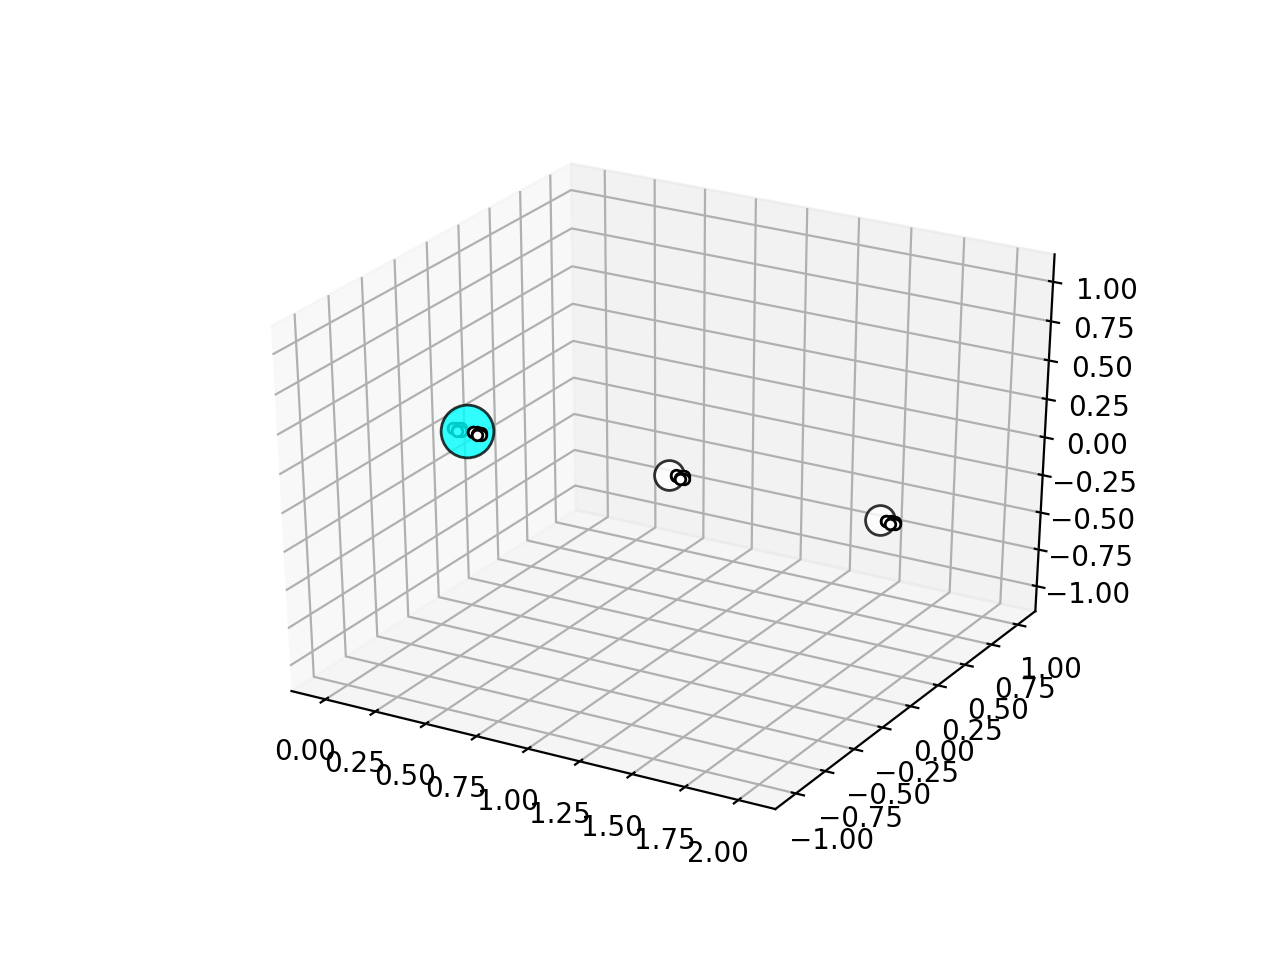

In [5]:
port2_C = mb.Port(anchor=carbon, orientation=[-1, 0, 0], separation=0.05)
ch2.add(port2_C, label='left')

port_H = mb.Port(anchor=hydrogen, orientation=[1, 0, 0], separation=0.05)
ch2.add(port_H, label='H1')

port2_H = mb.Port(anchor=hydrogen2, orientation=[1, 0, 0], separation=0.05)
ch2.add(port2_H, label='H2')

visualize(ch2)

The `force_overlap` function is then used to force the overlap of two `Ports` by performing a coordinate transform on one of the two `Compounds` that are to be connected. This will also create a bond between the anchor `Particles` of each `Port`. We'll use this function here to connect each hydrogen to the carbon `Particle`.

<IPython.core.display.Javascript object>


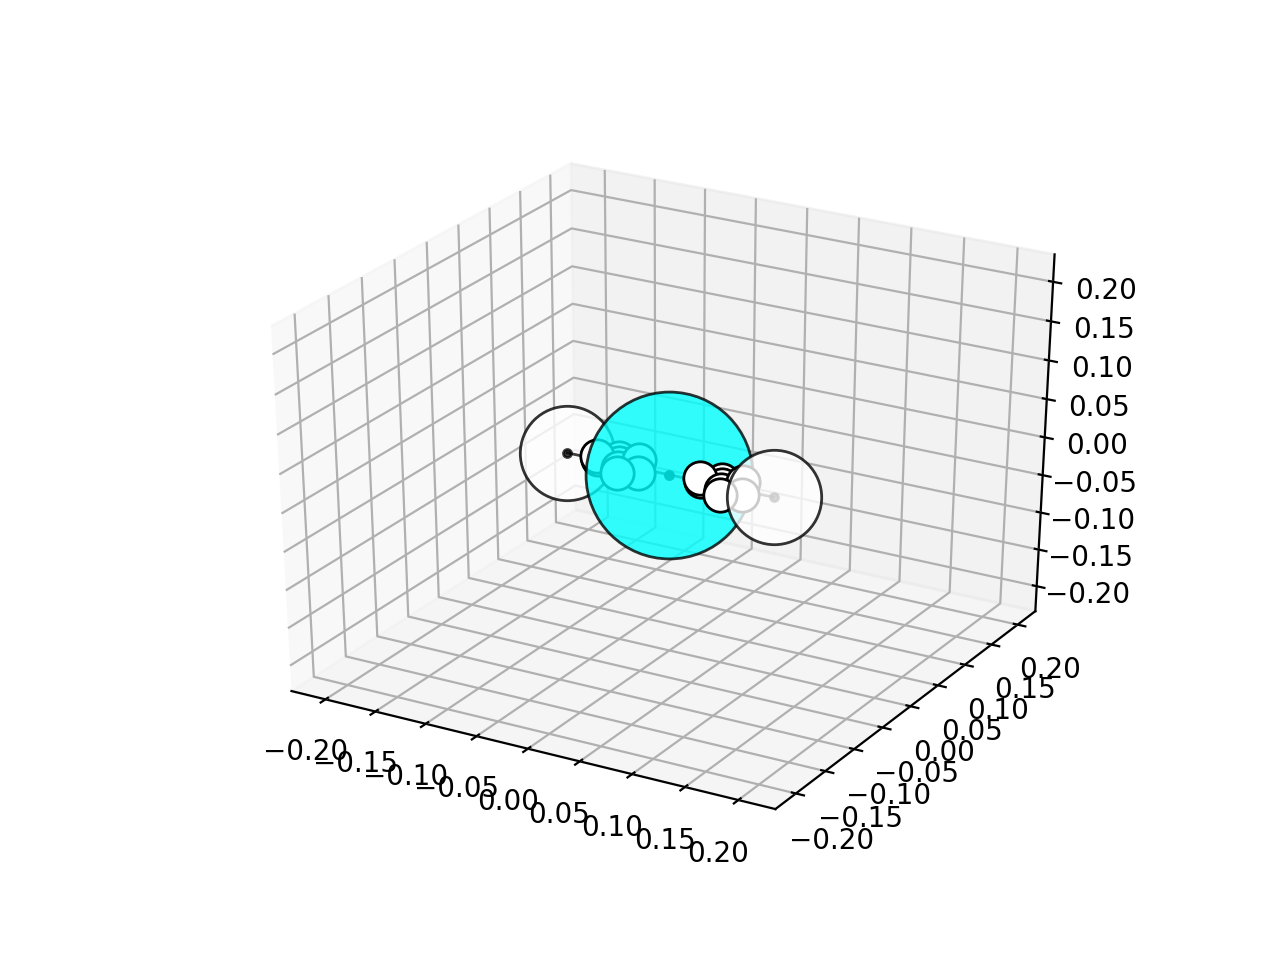

In [6]:
mb.force_overlap(move_this=hydrogen,
                 from_positions=ch2['H1'],
                 to_positions=ch2['right'])

mb.force_overlap(move_this=hydrogen2,
                 from_positions=ch2['H2'],
                 to_positions=ch2['left'])

visualize(ch2)

As can be seen above, the hydrogen atoms were appropriately translated and oriented to create the expected ch2 structure. By default, the visualization script will show the ports when visualizing.  To turn this off, set `show_ports` to false.  Note, to see arguments accepted by visualize, use the help command).

In [7]:
help(visualize)

Help on function visualize in module visualize:

visualize(compound, show_bonds=True, show_ports=True, box=None, verbose=False)



<IPython.core.display.Javascript object>


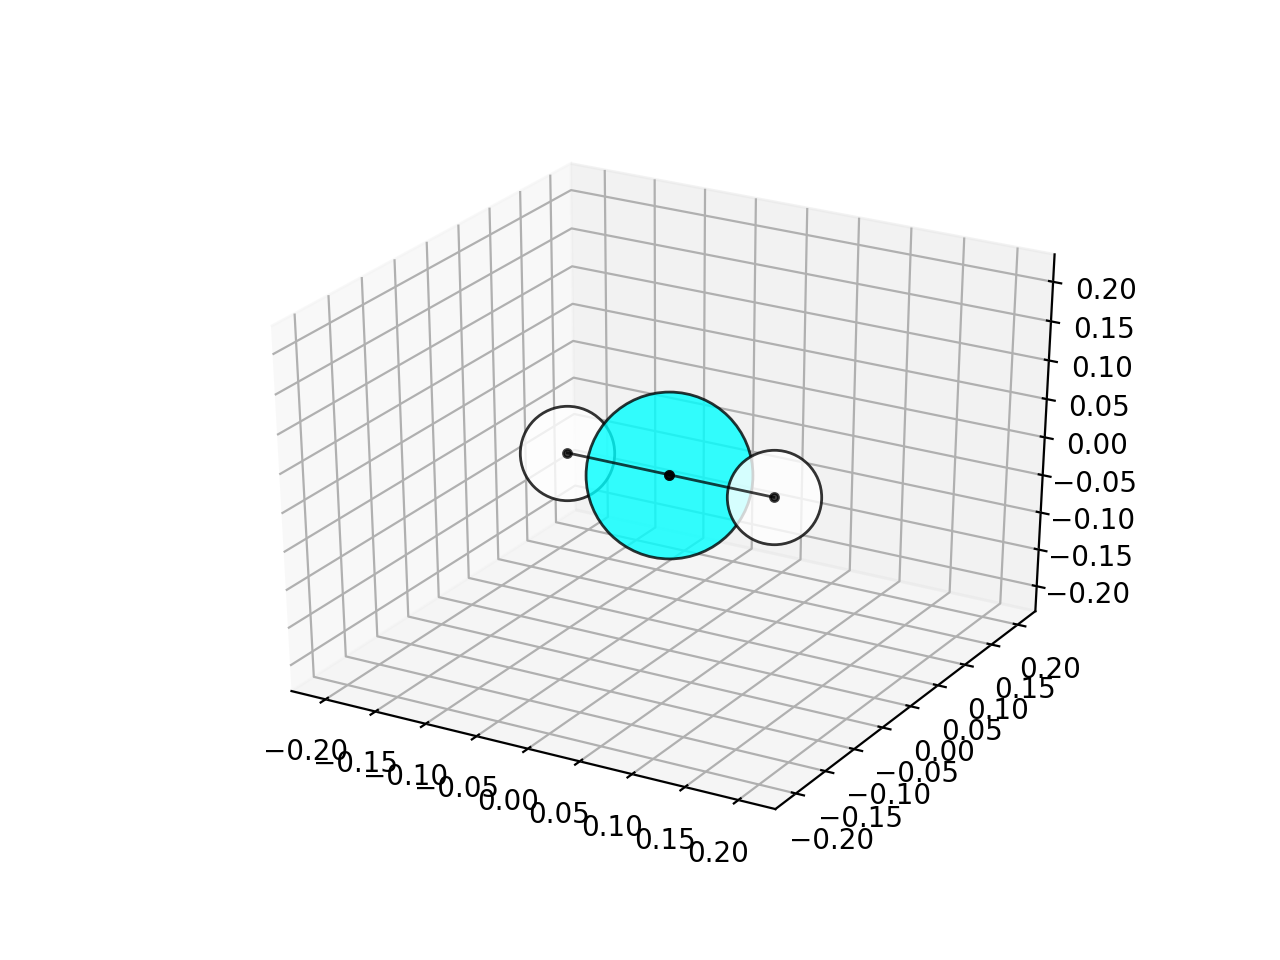

In [8]:
visualize(ch2, show_ports=False)

In the example above, two separate hydrogen `Compounds` were constructed.  This same functionality could be achieved by creating a single hydrogen, and using the clone operation to make a copy, then appropriately transla.  To 

<IPython.core.display.Javascript object>


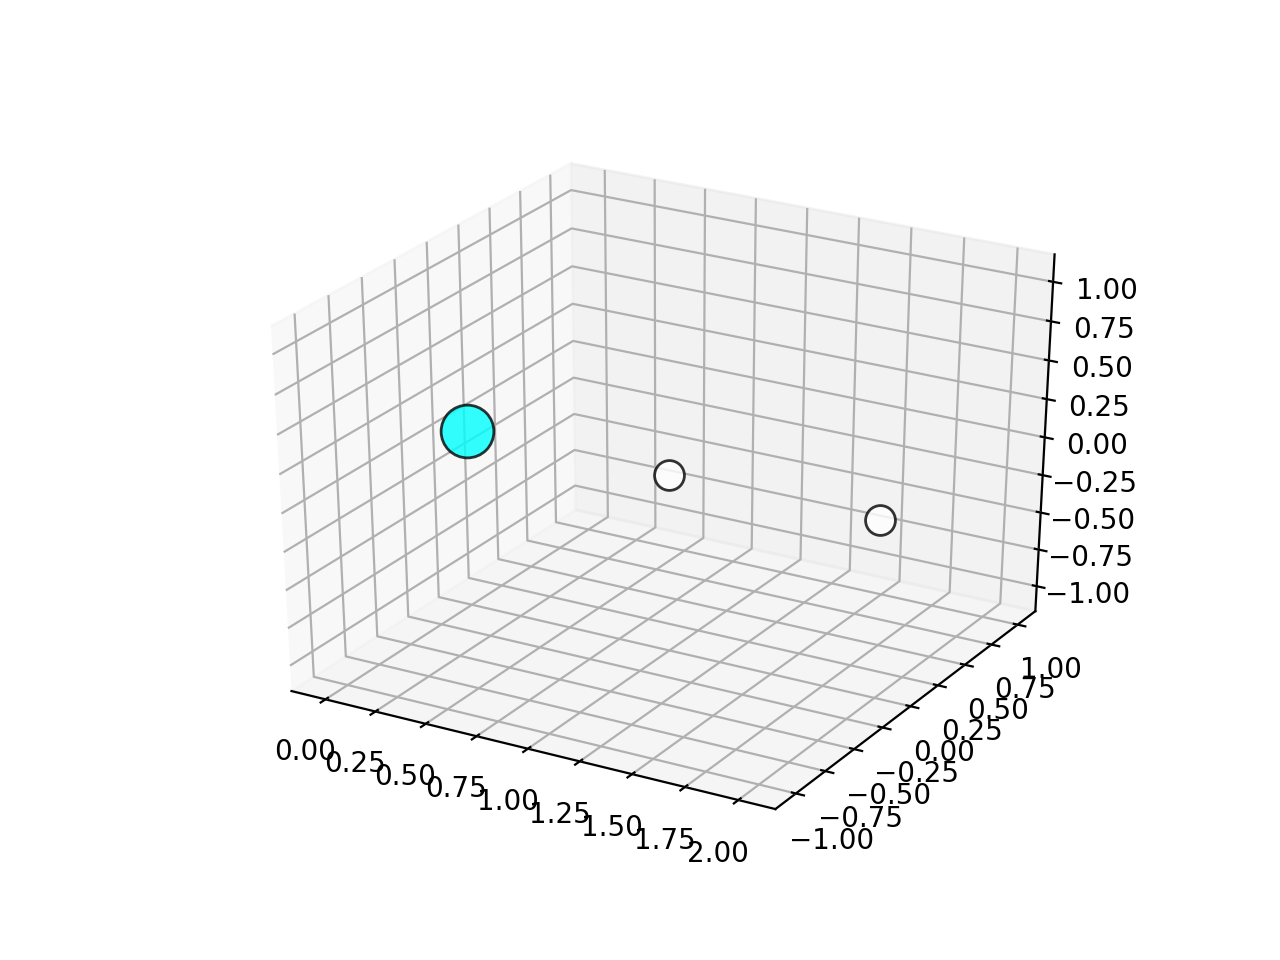

In [14]:
ch2 = mb.Compound()
carbon = mb.Particle(pos=[0.0, 0.0, 0.0], name='C')
hydrogen = mb.Particle(pos=[1.0, 0.0, 0.0], name='H')
hydrogen2 = mb.clone(hydrogen)
hydrogen2.translate_to([2.0,0.0, 0.0])
ch2.add([carbon, hydrogen, hydrogen2])
visualize(ch2)